In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_train.csv", header=0)
#import os
#dataset = pd.read_csv(os.getcwd()+"/Telco-Customer-Churn.csv", header=0)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 38 columns):
MachineID                      674 non-null object
MachineModel                   674 non-null object
ServicePeriod                  674 non-null int64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null object
MostOccuredError               674 non-null object
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
comp_4_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null object
MostReplacedComp  

In [4]:
dataset.head()

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
0,MID11001,model4,21,60.00,35.65,40.71,0.0,65.00,13.58,error2,...,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33,ComponentRepair
1,MID11002,model1,21,0.00,150.00,150.00,95.0,95.00,31.50,error5,...,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49,ComponentRepair
2,MID11003,model3,22,37.50,90.00,93.54,0.0,85.00,27.27,error3,...,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54,NoIssue
3,MID11004,model4,22,42.41,78.75,78.75,0.0,52.50,18.53,error2,...,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59,NoIssue
4,MID11005,model3,22,44.21,96.44,33.24,0.0,56.25,19.02,error2,...,66.24,110.95,242.30,64.10,22.16,170.82,446.06,100.76,40.57,ComponentRepair


In [5]:
dataset.tail(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
669,MID11845,model2,5,18.78,60.00,60.0,82.50,0.0,23.57,error4,...,64.44,116.03,226.84,63.30,22.10,170.90,447.85,101.06,40.20,NoIssue
670,MID11846,model3,4,44.88,45.00,45.0,23.71,0.0,15.50,error1,...,66.57,109.56,159.59,64.30,17.12,170.66,447.11,100.68,40.26,ComponentRepair
671,MID11847,model2,3,72.49,26.21,40.0,55.00,0.0,15.29,error2,...,66.77,119.70,223.41,58.28,23.15,170.72,446.87,101.42,40.26,ComponentReplacement
672,MID11848,model4,4,70.00,0.00,7.6,17.19,0.0,31.69,error1,...,62.87,117.16,160.57,62.36,20.97,170.80,447.65,100.49,40.26,ComponentRepair
673,MID11850,model3,3,39.10,54.00,54.0,0.00,0.0,21.39,error1,...,61.84,114.43,224.84,61.71,20.54,170.67,444.25,100.78,40.15,ComponentRepair


In [6]:
dataset.describe()

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,13.091988,44.113991,47.677389,46.326365,19.600445,25.634139,26.116884,37.440282,44.943234,18.009629,...,155.885697,64.889674,113.157478,217.153442,62.113843,21.118279,170.758917,446.624199,100.842478,40.365356
std,5.288455,34.573864,31.041506,31.879803,30.278308,33.797062,9.207301,39.119877,36.152294,31.166810,...,7.704799,2.921304,4.886335,26.071793,3.058292,1.519342,0.229260,0.889770,0.283153,0.125382
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,144.120000,58.490000,87.780000,102.170000,50.540000,14.640000,170.140000,443.760000,100.240000,40.090000
25%,9.000000,5.225000,29.580000,23.907500,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,150.752500,62.962500,110.627500,205.285000,60.420000,20.342500,170.610000,446.010000,100.650000,40.270000
50%,13.000000,45.000000,48.825000,48.000000,0.000000,0.000000,24.230000,35.000000,48.375000,0.000000,...,153.925000,64.290000,113.830000,221.575000,62.510000,21.265000,170.760000,446.605000,100.770000,40.340000
75%,18.000000,65.732500,67.500000,67.097500,45.000000,57.000000,30.000000,69.375000,67.500000,45.000000,...,158.175000,66.025000,116.487500,235.415000,64.380000,22.147500,170.900000,447.260000,100.990000,40.460000
max,22.000000,147.380000,157.500000,157.500000,135.000000,135.000000,95.390000,142.500000,162.060000,135.000000,...,195.270000,79.110000,123.610000,269.030000,67.840000,24.290000,171.530000,449.480000,101.660000,40.680000


In [7]:
dataset.drop(labels='MachineID', axis=1, inplace=True)

In [8]:
dataset.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
comp_4_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_mi

In [9]:
columns = dataset.columns
cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']
num_attr = list(set(columns) - set(cat_attr))

In [10]:
print("The total columns in the dataset are {}".format(len(columns)))
print("The numerical columns in the dataset are {}".format(len(num_attr)))
print("The categorical columns in the dataset are {}".format(len(cat_attr)))

The total columns in the dataset are 37
The numerical columns in the dataset are 29
The categorical columns in the dataset are 8


In [11]:
dataset[num_attr] = dataset[num_attr].apply(lambda x: x.astype('float64'))

In [12]:
dataset[cat_attr] = dataset[cat_attr].apply(lambda x: x.astype('category'))
#dataset['ActionPoint'] = pd.Categorical(dataset['ActionPoint'])

In [13]:
dataset.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
comp_4_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64


In [14]:
dataset.shape

(674, 37)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 37 columns):
MachineModel                   674 non-null category
ServicePeriod                  674 non-null float64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null category
MostOccuredError               674 non-null category
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
comp_4_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null category
MostReplacedComp               674 non-null category
comp1_

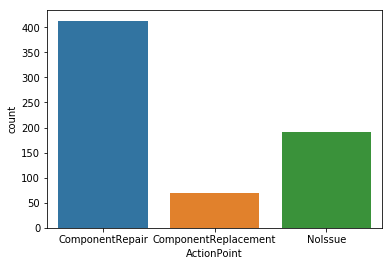

In [16]:
sns.countplot(x='ActionPoint', data=dataset)
#plt.savefig('class_prop.png')
plt.show()

In [17]:
dataset['ActionPoint'].value_counts()/100

ComponentRepair         4.13
NoIssue                 1.91
ComponentReplacement    0.70
Name: ActionPoint, dtype: float64

In [18]:
lab_enc = LabelEncoder()
lab_enc.fit(dataset['ActionPoint'])
dataset['ActionPoint'] = lab_enc.transform(dataset['ActionPoint'])

In [19]:
dataset['ActionPoint'].value_counts()

0    413
2    191
1     70
Name: ActionPoint, dtype: int64

In [20]:
labels = dataset['ActionPoint']
print(len(labels))
dataset.drop(labels='ActionPoint', axis=1, inplace=True)

674


In [21]:
print(list(set(cat_attr)-set(['ActionPoint'])))
print(cat_attr)
##dataset_dumm = pd.get_dummies(data=dataset, columns=cat_attr)

['MostReplacedComp', 'MostRepairedComponent', 'MostOccuredError', 'RecentReplacedComp', 'MachineModel', 'RecentError', 'RecentRepaired']
['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']


In [22]:
dataset_dumm = pd.get_dummies(data=dataset, columns=list(set(cat_attr)-set(['ActionPoint'])))

In [23]:
dataset_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg', 'comp_4_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MostReplacedComp_Component1', 'MostReplacedComp_Component2',
       'MostReplacedComp_Component3', 'MostReplacedComp_Component4',
       'MostRepairedComponent_Component1', 'MostRepairedComponent_Component2',
       'MostRepairedComponent_Component3', 'MostRepairedComponent_Component4',
       'MostOccuredError_error1', 'MostOccuredError_error2',
       'MostOccuredError_error3', 'MostOccuredError_error

In [24]:
dataset_dumm.head(6)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model4,RecentError_error1,RecentError_error2,RecentError_error3,RecentError_error4,RecentError_error5,RecentRepaired_Component1,RecentRepaired_Component2,RecentRepaired_Component3,RecentRepaired_Component4
0,21.0,60.00,35.65,40.71,0.0,65.00,13.58,60.0,47.5,0.0,...,1,0,1,0,0,0,0,0,1,0
1,21.0,0.00,150.00,150.00,95.0,95.00,31.50,0.0,150.0,95.0,...,0,0,0,0,0,1,0,0,1,0
2,22.0,37.50,90.00,93.54,0.0,85.00,27.27,37.5,135.0,0.0,...,0,0,0,1,0,0,0,1,0,0
3,22.0,42.41,78.75,78.75,0.0,52.50,18.53,0.0,105.0,0.0,...,1,0,1,0,0,0,0,1,0,0
4,22.0,44.21,96.44,33.24,0.0,56.25,19.02,45.0,30.0,0.0,...,0,0,1,0,0,0,0,0,0,1
5,21.0,41.25,19.81,7.57,98.9,40.00,14.13,82.5,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


### Decision Trees

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset_dumm, labels, test_size=0.4, stratify=labels, random_state=1234)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
#Setting up pipeline
#steps = [
#         ('DT', DecisionTreeClassifier())] #('scaler', StandardScaler()),
#pipeline = Pipeline(steps)

In [28]:
#param_grid = {'DT__criterion': ['entropy'], 'DT__max_depth': [3,4,5,6], 'DT__max_features':['log2'], 'DT__class_weight':[{2:3}]}
#dt_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=6)

In [29]:
#dt_grid.fit(X_train,y_train)

In [30]:
#dt_cv_best = dt_grid.best_estimator_
#y_preds = dt_cv_best.predict(X_test)

In [31]:
#print(dt_grid.best_params_)
#print(dt_grid.best_score_)

In [32]:
#print(dt_cv_best.score(X_test,y_test))
#print(classification_report(y_test, y_preds))

In [33]:
decisiontree_model = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=786, max_depth=6)

In [34]:
decisiontree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=786,
            splitter='best')

In [35]:
test_accuracy= decisiontree_model.fit(X_train,y_train).score(X_test,y_test)
predictions=decisiontree_model.fit(X_train,y_train).predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.65      0.52      0.57       165
          1       0.20      0.32      0.25        28
          2       0.43      0.53      0.48        77

avg / total       0.54      0.50      0.51       270



In [35]:
feature_names = X_train.columns
class_name = decisiontree_model.classes_.astype(int).astype(str)

#print(class_name)

def output_pdf(clf_, name):
   from sklearn import tree
   from sklearn.externals.six import StringIO
   import pydot_ng as pydot
   dot_data = StringIO()
   tree.export_graphviz(decisiontree_model, out_file=dot_data,
                        feature_names=feature_names,
                        class_names=class_name,
                        filled=True, rounded=True,
                        special_characters=True,
                         node_ids=1,)
   graph = pydot.graph_from_dot_data(dot_data.getvalue())
   graph.write_pdf("%s.pdf"%name)

output_pdf(decisiontree_model, name='DecisionTree%s')


In [ ]:
### Decision tree viz
# Export as dot
#export_graphviz(decisiontree_model, 'shorttree.dot', rounded = True, 
#                feature_names = ['x1', 'x2'], 
#                class_names = ['0', '1'], filled = True)

#call(['dot', '-Tpng', 'shorttree.dot', '-o', 'shorttree.png', '-Gdpi=400']);
#Image('shorttree.png')

#### Random Forest

In [159]:
#Setting up pipeline
#steps_rf = [('scaler', StandardScaler()),
#         ('DT', RandomForestClassifier())]
#pipeline_rf = Pipeline(steps_rf)

In [168]:
#param_grid_rf = {'DT__n_estimators':[15, 20, 25, 30, 35, 40], 'DT__criterion': ['entropy'], 'DT__max_depth': [8, 10, 12, 15, 18, 20], 
#                 'DT__max_features':['log2'], 'DT__class_weight':[{0:0.5}, {1:3}, {2:1}]} #
#rf_grid = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=6)

In [175]:
rf_grid = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5, n_jobs=-1, random_state=153, verbose=1,class_weight=None)

In [176]:
rf_grid.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=153, verbose=1, warm_start=False)

In [178]:
#rf_cv_best = rf_grid.best_estimator_
#y_preds = rf_cv_best.predict(X_test)
y_preds = rf_grid.predict(X_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [179]:
#print(rf_grid.best_params_)
#print(rf_grid.best_score_)

In [180]:
#print(rf_cv_best.score(X_test,y_test))
#print(classification_report(y_test, y_preds))
print(rf_grid.score(X_test,y_test))
print(classification_report(y_test, y_preds))

0.6518518518518519
             precision    recall  f1-score   support

          0       0.67      0.89      0.76       165
          1       0.00      0.00      0.00        28
          2       0.59      0.38      0.46        77

avg / total       0.58      0.65      0.60       270



[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\chait\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [181]:
#rf_grid.steps[1]

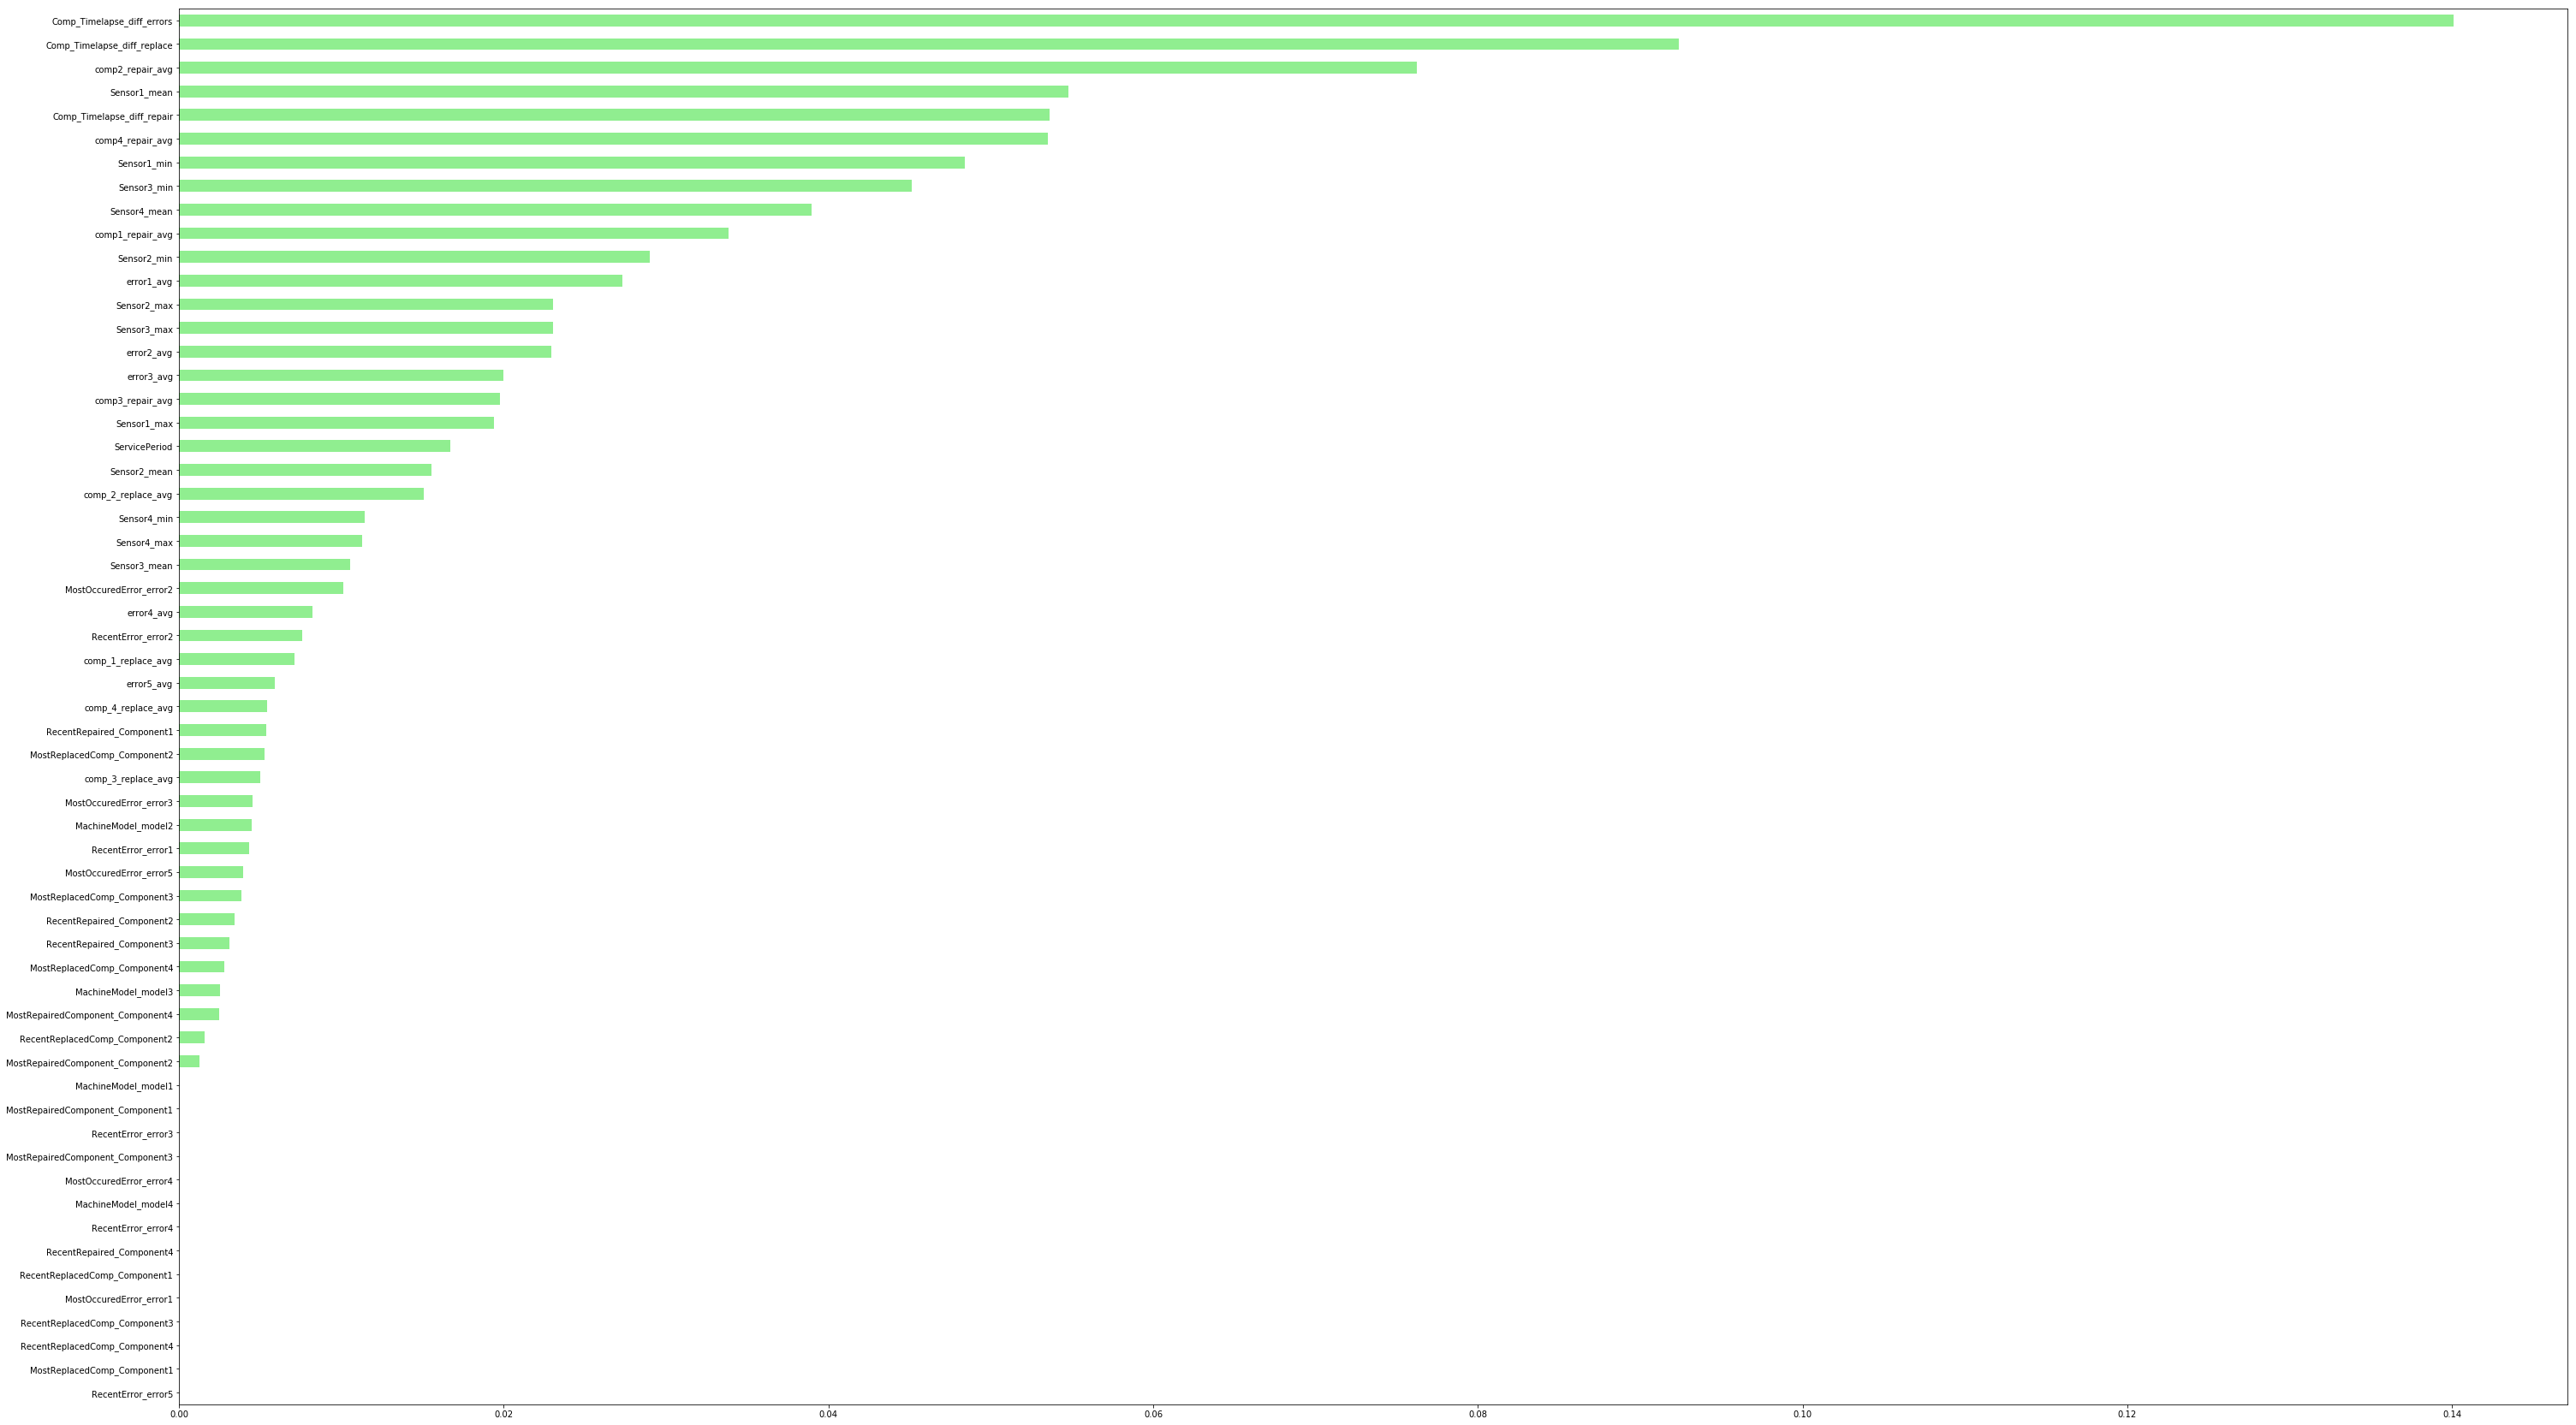

In [198]:
importances_rf = pd.Series(rf_grid.feature_importances_,index = X_train.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh',color='lightgreen')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size
#plt.figure(figsize=(160,500))
plt.show()

#### Using Variable importance features

In [205]:
sorted_importances_rf.sort_values(ascending=False, inplace=True)
print(sorted_importances_rf[:10])
print(type(sorted_importances_rf))

Comp_Timelapse_diff_errors     0.140108
Comp_Timelapse_diff_replace    0.092393
comp2_repair_avg               0.076212
Sensor1_mean                   0.054762
Comp_Timelapse_diff_repair     0.053625
comp4_repair_avg               0.053503
Sensor1_min                    0.048395
Sensor3_min                    0.045114
Sensor4_mean                   0.038940
comp1_repair_avg               0.033828
dtype: float64
<class 'pandas.core.series.Series'>


In [214]:
imp_features = list(sorted_importances_rf.index.values[:12]) 

In [219]:
dataset_imp = dataset_dumm[imp_features]
dataset_imp.head(5)

,Comp_Timelapse_diff_errors,Comp_Timelapse_diff_replace,comp2_repair_avg,Sensor1_mean,Comp_Timelapse_diff_repair,comp4_repair_avg,Sensor1_min,Sensor3_min,Sensor4_mean,comp1_repair_avg,Sensor2_min,error1_avg
0,13.58,25.91,32.91,171.26,14.47,87.80,113.81,61.86,40.33,43.50,217.34,60.00
1,31.50,42.86,78.67,170.38,16.17,31.86,108.43,62.02,40.49,76.00,208.67,0.00
2,27.27,42.86,43.67,170.77,15.52,46.89,111.57,51.25,40.54,72.83,244.51,37.50
3,18.53,39.38,43.25,170.74,17.50,50.88,111.27,61.19,40.59,63.00,238.93,42.41
4,19.02,28.12,29.40,170.82,15.41,40.64,110.95,64.10,40.57,57.43,242.30,44.21


In [218]:
print(dataset_imp.shape)

(674, 12)


In [220]:
X_train, X_test, y_train, y_test = train_test_split(dataset_imp, labels, test_size=0.4, stratify=labels, random_state=1234)

In [303]:
rf_imp = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=5, random_state=153, class_weight={0:0.3, 1:2, 2:.7})

In [329]:
rf_imp.fit(X_train,y_train)
y_preds = rf_imp.predict(X_test)

In [331]:
print(rf_imp.score(X_test,y_test))
print(classification_report(y_test, y_preds))

0.662962962962963
             precision    recall  f1-score   support

          0       0.74      0.70      0.72       165
          1       0.56      0.36      0.43        28
          2       0.55      0.69      0.61        77

avg / total       0.67      0.66      0.66       270



### Predicting on test data and writing results back to csv

In [306]:
test = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_test.csv", header=0)

In [307]:
test.head(6)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
0,MID11006,model3,21,45.00,20.0,20.0,0.0,50.00,19.00,error1,...,156.43,65.47,113.24,198.63,61.67,21.63,170.78,446.93,100.87,40.55
1,MID11007,model2,21,30.00,25.9,0.0,60.0,40.00,17.14,error5,...,158.08,64.81,117.10,235.26,57.40,21.46,170.26,446.78,101.52,40.64
2,MID11039,model3,22,45.00,60.0,60.0,0.0,75.00,23.08,error1,...,152.31,69.27,118.99,217.51,64.54,21.08,170.94,446.35,100.87,40.57
3,MID11045,model4,21,30.00,25.0,25.0,0.0,62.26,16.98,error5,...,163.95,64.18,115.16,218.24,55.81,20.89,171.17,447.03,100.84,40.36
4,MID11049,model4,21,0.00,0.0,0.0,38.6,67.50,33.75,error5,...,146.07,64.56,102.39,205.97,66.63,21.34,170.73,446.50,100.61,40.52
5,MID11052,model3,21,84.43,100.0,100.0,0.0,75.00,22.50,error3,...,147.56,66.28,117.62,234.11,64.21,20.84,170.56,445.97,100.63,40.40


In [308]:
test_machineID = test.MachineID.tolist()
test.drop(labels='MachineID', axis=1, inplace=True)

In [309]:
test_machineID[5]

'MID11052'

In [310]:
test.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
comp_4_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_mi

In [311]:
test.dtypes

MachineModel                    object
ServicePeriod                    int64
error1_avg                     float64
error2_avg                     float64
error3_avg                     float64
error4_avg                     float64
error5_avg                     float64
Comp_Timelapse_diff_errors     float64
RecentError                     object
MostOccuredError                object
comp_1_replace_avg             float64
comp_2_replace_avg             float64
comp_3_replace_avg             float64
comp_4_replace_avg             float64
Comp_Timelapse_diff_replace    float64
RecentReplacedComp              object
MostReplacedComp                object
comp1_repair_avg               float64
comp2_repair_avg               float64
comp3_repair_avg               float64
comp4_repair_avg               float64
Comp_Timelapse_diff_repair     float64
RecentRepaired                  object
MostRepairedComponent           object
Sensor1_max                    float64
Sensor2_max              

In [312]:
test_columns = dataset.columns
test_cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent']
#num_attr = ['tenure', 'MonthlyCharges', 'TotalCharges']
test_num_attr = list(set(test_columns) - set(test_cat_attr))

In [313]:
print("The total columns in the dataset are {}".format(len(test_columns)))
print("The numerical columns in the dataset are {}".format(len(test_num_attr)))
print("The categorical columns in the dataset are {}".format(len(test_cat_attr)))

The total columns in the dataset are 36
The numerical columns in the dataset are 29
The categorical columns in the dataset are 7


In [314]:
test[test_num_attr] = dataset[test_num_attr].apply(lambda x: x.astype('float64'))

In [315]:
test[test_cat_attr] = dataset[test_cat_attr].apply(lambda x: x.astype('category'))

In [316]:
test.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
comp_4_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64


In [317]:
test_dumm = pd.get_dummies(data=test, columns=test_cat_attr)

In [318]:
test_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg', 'comp_4_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MachineModel_model1', 'MachineModel_model2', 'MachineModel_model3',
       'MachineModel_model4', 'RecentError_error1', 'RecentError_error2',
       'RecentError_error3', 'RecentError_error4', 'RecentError_error5',
       'MostOccuredError_error1', 'MostOccuredError_error2',
       'MostOccuredError_error3', 'MostOccuredError_error4',
       'MostOccuredError_error5', 'RecentReplacedComp_Component1',
  

In [319]:
### Using variable importance model

In [320]:
test_imp = test_dumm[imp_features]
test_imp.head(5)

,Comp_Timelapse_diff_errors,Comp_Timelapse_diff_replace,comp2_repair_avg,Sensor1_mean,Comp_Timelapse_diff_repair,comp4_repair_avg,Sensor1_min,Sensor3_min,Sensor4_mean,comp1_repair_avg,Sensor2_min,error1_avg
0,13.58,25.91,32.91,171.26,14.47,87.80,113.81,61.86,40.33,43.50,217.34,60.00
1,31.50,42.86,78.67,170.38,16.17,31.86,108.43,62.02,40.49,76.00,208.67,0.00
2,27.27,42.86,43.67,170.77,15.52,46.89,111.57,51.25,40.54,72.83,244.51,37.50
3,18.53,39.38,43.25,170.74,17.50,50.88,111.27,61.19,40.59,63.00,238.93,42.41
4,19.02,28.12,29.40,170.82,15.41,40.64,110.95,64.10,40.57,57.43,242.30,44.21


In [322]:
test_preds = rf_imp.predict(test_imp)

In [323]:
print(test_preds.shape)
print(test_dumm.shape)

(326,)
(326, 59)


In [324]:
result_preds = lab_enc.inverse_transform(test_preds)
print(result_preds[:4])
print(np.unique(result_preds))

['ComponentRepair' 'NoIssue' 'NoIssue' 'NoIssue']
['ComponentRepair' 'ComponentReplacement' 'NoIssue']


C:\Users\chait\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [325]:
print("Length of test machine ID {}".format(len(test_machineID)))
print("Length of test pred classes {}".format(len(result_preds)))

Length of test machine ID 326
Length of test pred classes 326


In [326]:
test_dict = {'MachineID':test_machineID, 'ActionPoint': result_preds}
test_df = pd.DataFrame(test_dict)

In [327]:
test_df.head(5)

,MachineID,ActionPoint
0,MID11006,ComponentRepair
1,MID11007,NoIssue
2,MID11039,NoIssue
3,MID11045,NoIssue
4,MID11049,ComponentRepair


In [328]:
test_df.to_csv('../submissions/rf_imp.csv', index=False)